# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [1]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [4]:
from tensorflow.keras.backend import backend
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


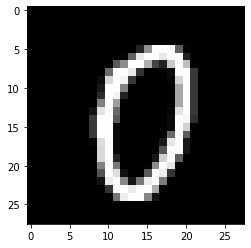

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [6]:
print(type(y_train))

<class 'numpy.ndarray'>


In [7]:
import numpy as np

In [99]:
train_index01234 = np.where(y_train <= 4)
train_index56789 = np.where(y_train > 4)
test_index01234 = np.where(y_test <= 4)
test_index56789 = np.where(y_test > 4)

X_train_01234 = X_train[train_index01234]
y_train_01234 = y_train[train_index01234]

X_train_56789 = X_train[train_index56789]
y_train_56789 = y_train[train_index56789]

X_test_01234 = X_test[test_index01234]
y_test_01234 = y_test[test_index01234]

X_test_56789 = X_test[test_index56789]
y_test_56789 = y_test[test_index56789]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [100]:
print("X_train_01234: ", X_train_01234.shape)
print("y_train_01234: ", y_train_01234.shape)
print("X_train_56789: ", X_train_56789.shape)
print("y_train_56789: ", y_train_56789.shape)
print("X_test_01234: ", X_test_01234.shape)
print("y_test_01234: ", y_test_01234.shape)
print("X_test_56789: ", X_test_56789.shape)
print("y_test_56789: ", y_test_56789.shape)

X_train_01234:  (30596, 28, 28)
y_train_01234:  (30596,)
X_train_56789:  (29404, 28, 28)
y_train_56789:  (29404,)
X_test_01234:  (5139, 28, 28)
y_test_01234:  (5139,)
X_test_56789:  (4861, 28, 28)
y_test_56789:  (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [36]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  
# N_E = Number of Examples, 
# N_H = height, 
# N_W = Width, 
# N_C = Number of Channels.
X_train_01234 = X_train_01234.reshape(X_train_01234.shape[0], img_rows, img_cols, 1)
X_test_01234 = X_test_01234.reshape(X_test_01234.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [37]:
"""
Without type casting, the normalize code gives error: 
    
    TypeError: No loop matching the specified signature and casting
    was found for ufunc true_divide

"""
X_train_01234 = X_train_01234.astype('float32')
X_test_01234 = X_test_01234.astype('float32')

#Normalizing the input
X_train_01234 /= 255
X_test_01234 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [98]:
print('X_train_01234 shape:', X_train_01234.shape)
print(X_train_01234.shape[0], 'train samples')
print(X_test_01234.shape[0], 'test samples')

X_train_01234 shape: (30596, 28, 28)
30596 train samples
5139 test samples


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [42]:
import tensorflow

num_classes = 5  # 0, 1, 2, 3, 4

# convert class vectors to binary class matrices
y_train_01234 = tensorflow.keras.utils.to_categorical(y_train_01234, num_classes)
y_test_01234 = tensorflow.keras.utils.to_categorical(y_test_01234, num_classes)

In [48]:
print(y_train_01234.shape)
print(y_test_01234.shape)
print(y_train_01234[0])
print(y_test_01234[0])

(30596, 5)
(5139, 5)
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]


## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [63]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.20 probability 
model.add(Dropout(0.20,name='drop_1'))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [68]:
#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [69]:
batch_size = 128
epochs = 10

In [70]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [71]:
#Training on the dataset
model.fit(X_train_01234, y_train_01234,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_01234, y_test_01234))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 15s 504us/sample - loss: 1.5910 - accuracy: 0.2830 - val_loss: 1.5593 - val_accuracy: 0.4777
Epoch 2/10
30596/30596 [==============================] - 8s 268us/sample - loss: 1.5285 - accuracy: 0.4602 - val_loss: 1.4640 - val_accuracy: 0.6495
Epoch 3/10
30596/30596 [==============================] - 8s 257us/sample - loss: 1.3902 - accuracy: 0.6017 - val_loss: 1.2272 - val_accuracy: 0.8017
Epoch 4/10
30596/30596 [==============================] - 8s 264us/sample - loss: 1.0706 - accuracy: 0.7382 - val_loss: 0.7372 - val_accuracy: 0.8963
Epoch 5/10
30596/30596 [==============================] - 8s 269us/sample - loss: 0.6697 - accuracy: 0.8241 - val_loss: 0.3760 - val_accuracy: 0.9288
Epoch 6/10
30596/30596 [==============================] - 8s 264us/sample - loss: 0.4495 - accuracy: 0.8692 - val_loss: 0.2413 - val_accuracy: 0.9469
Epoch 7/10
30596/30596 [==========================

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [73]:
#Testing the model on test set
score = model.evaluate(X_test_01234, y_test_01234, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13072554838752487
Test accuracy: 0.96400076


In [74]:
# #Set the path where you want to store the model and weights. 
# model.save('cnn_svhn_01234.h5')
# model.save_weights('cnn_svhn_01234_weights.h5')

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [104]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_1
False
drop_1
False
flatten
False
flatten_1
False
dense_1
True
drop_2
False
dense_2
True


In [105]:
#The pre-trained weights must exist in a folder called "data" in the current folder
model.load_weights('cnn_svhn_01234_weights.h5')

In [106]:
optimizer = SGD(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [107]:
num_classes = 5  # 5, 6, 7, 8, 9

"""
For using in to_categorical(), the values should start from 0.
However, in the 2nd dataset, the values start from 5.
Therefore, subtract 5 from each label in the 2nd dataset.
"""
y_train_56789 = y_train_56789 - 5
y_test_56789 = y_test_56789 - 5

In [109]:
print(y_train_56789)
print(y_test_56789)

[0 4 0 ... 0 1 3]
[2 4 0 ... 4 0 1]


### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [110]:
"""
PREPROCESS SECOND DATA SET FOR TRAINING
"""

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  
# N_E = Number of Examples, 
# N_H = height, 
# N_W = Width, 
# N_C = Number of Channels.
X_train_56789 = X_train_56789.reshape(X_train_56789.shape[0], img_rows, img_cols, 1)
X_test_56789 = X_test_56789.reshape(X_test_56789.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [111]:
"""
Without type casting, the normalize code gives error: 
    
    TypeError: No loop matching the specified signature and casting
    was found for ufunc true_divide

"""
X_train_01234 = X_train_01234.astype('float32')
X_test_01234 = X_test_01234.astype('float32')

#Normalizing the input
X_train_01234 /= 255
X_test_01234 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [112]:
print('X_train_56789 shape:', X_train_56789.shape)
print(X_train_56789.shape[0], 'train samples')
print(X_test_56789.shape[0], 'test samples')

X_train_56789 shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [113]:
# convert class vectors to binary class matrices
y_train_56789 = tensorflow.keras.utils.to_categorical(y_train_56789, num_classes)
y_test_56789 = tensorflow.keras.utils.to_categorical(y_test_56789, num_classes)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [114]:
#Training on the dataset
model.fit(X_train_56789, y_train_56789,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_56789, y_test_56789))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 5s 172us/sample - loss: 18.9848 - accuracy: 0.2969 - val_loss: 1.3669 - val_accuracy: 0.3637
Epoch 2/10
29404/29404 [==============================] - 4s 124us/sample - loss: 1.4226 - accuracy: 0.3353 - val_loss: 1.2122 - val_accuracy: 0.4024
Epoch 3/10
29404/29404 [==============================] - 4s 132us/sample - loss: 1.3423 - accuracy: 0.3693 - val_loss: 1.0685 - val_accuracy: 0.4775
Epoch 4/10
29404/29404 [==============================] - 4s 123us/sample - loss: 1.3046 - accuracy: 0.4006 - val_loss: 0.9583 - val_accuracy: 0.6363
Epoch 5/10
29404/29404 [==============================] - 4s 130us/sample - loss: 1.2470 - accuracy: 0.4592 - val_loss: 0.8889 - val_accuracy: 0.6830
Epoch 6/10
29404/29404 [==============================] - 4s 119us/sample - loss: 1.2045 - accuracy: 0.4834 - val_loss: 0.8657 - val_accuracy: 0.7005
Epoch 7/10
29404/29404 [==========================

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [115]:
#Testing the model on test set
score = model.evaluate(X_test_56789, y_test_56789, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8094658199785865
Test accuracy: 0.7220737


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [12]:
import pandas as pd

In [37]:
df = pd.read_csv('tweets.csv', encoding='latin')

### Drop null values
- drop all the rows with null values

In [38]:
print("shape before drop: ", df.shape)
df.dropna()
print("shape after drop: ", df.shape)

shape before drop:  (9093, 3)
shape after drop:  (9093, 3)


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [39]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [40]:
# Loop through each column and apply lowercase
for columnLabel in df.columns:
    df[columnLabel] = df[columnLabel].apply(lambda x: x if type(x) != str else x.lower())

print dataframe

In [41]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [42]:
df[df.columns[2]].unique()

array(['negative emotion', 'positive emotion',
       'no emotion toward brand or product', "i can't tell"], dtype=object)

In [43]:
# df = df.loc[df.columns[2].isin('positive emotion', 'negative emotion')]

df = df[(df[df.columns[2]] == 'positive emotion') | (df[df.columns[2]] == 'negative emotion')]

print(df.shape)
df.head()

(3548, 3)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [44]:
df[df.columns[2]] = df[df.columns[2]].apply(lambda x: 1 if x=='positive emotion' else 0)
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,0
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,1
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,1
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [45]:
# Drop the 2nd column (tells about the device)
df.drop(df.columns[1], axis=1, inplace=True)
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,1
2,@swonderlin can not wait for #ipad 2 also. the...,1
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,1


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(df.columns[1], axis=1)
Y = df[df.columns[1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2661, 1)
(2661,)
(887, 1)
(887,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [47]:
import nltk
# nltk.download('stopwords')

nltk.data.path
"""
Create a new folder 'corpora' into one of these folders. 
Move the zips downloaded from http://www.nltk.org/nltk_data/ into this folder. Or unzip the zip here.
"""

"\nCreate a new folder 'corpora' into one of these folders. \nMove the zips downloaded from http://www.nltk.org/nltk_data/ into this folder. Or unzip the zip here.\n"

In [48]:
from nltk.corpus import stopwords

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
from bs4 import BeautifulSoup
import re

"""
    Function to convert a raw review to a string of words.
    The input is a single string (a raw movie review).
    The output is a single string (a preprocessed movie review).
"""
def review_to_words(raw_review):
    
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [54]:
type(X_train)
# X_train

pandas.core.frame.DataFrame

In [83]:
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

for i in X_train.index:
    # Call function for each one, and add the result to the list of clean reviews
    inputDoc = X_train['tweet_text'][i]
    clean_train_reviews.append(review_to_words(inputDoc))

print(len(clean_train_reviews))

2661


In [86]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
# train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

print(train_data_features.shape)

Creating the bag of words...

(2661, 4874)


In [87]:
"""
Apply the vectorizer on the test data
"""
clean_test_reviews = []

for i in X_test.index:
    # Call function for each one, and add the result to the list of clean reviews
    inputDoc = X_test['tweet_text'][i]
    clean_test_reviews.append(review_to_words(inputDoc))

print(len(clean_test_reviews))

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

887


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [94]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(penalty='l2', max_iter=1000)

### Fit the classifer
- fit logistic regression classifier

In [97]:
logistic_model.fit(train_data_features, y_train)

C:\installationDirectory\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [102]:
from sklearn.naive_bayes import GaussianNB

naiveBayes_model = GaussianNB()

### Fit the classifer
- fit naive bayes classifier

In [103]:
naiveBayes_model.fit(train_data_features, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [105]:
logistic_prediction=logistic_model.predict(test_data_features)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [107]:
naiveBayes_prediction=naiveBayes_model.predict(test_data_features)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logistic_prediction)

0.8759864712514093

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [108]:
accuracy_score(y_test, naiveBayes_prediction)

0.7474633596392334

# EXTRAS

Use random forest classifier for classification

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
print("Training the random forest...")
forest = forest.fit(train_data_features, y_train)

# random forest performance through cross vaidation 
print(forest)
print(np.mean(cross_val_score(forest,train_data_features,y_train,cv=10)))

Training the random forest...
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8741094308805722
